In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import mediapy as media
import numpy as np
from diffusers import DDIMScheduler

try:
    from local_sd_pipeline import LocalStableDiffusionPipeline
    from optim_utils import *
except ModuleNotFoundError:
    import os; os.chdir("..")
    from local_sd_pipeline import LocalStableDiffusionPipeline
    from optim_utils import *

%load_ext autoreload
%autoreload 2

/home/hamid/miniforge3/envs/dgm_geometry/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# load model
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

model_id = "CompVis/stable-diffusion-v1-4"

pipe = LocalStableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    safety_checker=None,
    requires_safety_checker=False,
)
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to(device)

/home/hamid/miniforge3/envs/dgm_geometry/lib/python3.11/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00,  9.92it/s]


In [3]:
num_inference_steps = 50
guidance_scale = 7.5
num_images_per_prompt = 4
image_size = 512

In [4]:
prompt = "A painting of the Great Wave off Kanagawa by Katsushika Hokusai"
print(prompt)
seed = 0

A painting of the Great Wave off Kanagawa by Katsushika Hokusai


## Before Mitigation

100%|██████████| 50/50 [00:04<00:00, 11.57it/s]


prompt: A painting of the Great Wave off Kanagawa by Katsushika Hokusai


,,,

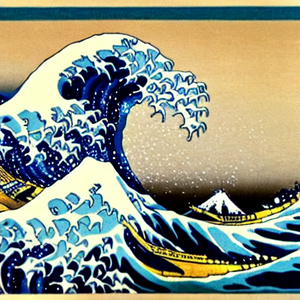
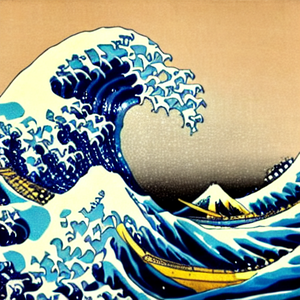
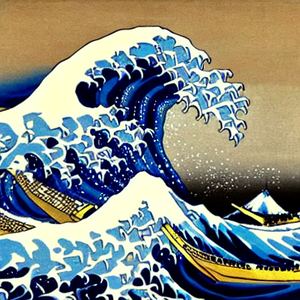
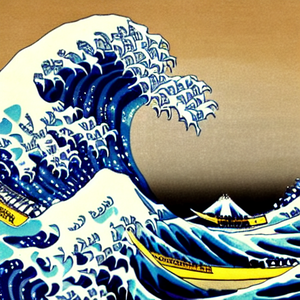

In [5]:
set_random_seed(seed)

outputs, track_stats = pipe(
    prompt,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    num_images_per_prompt=num_images_per_prompt,
    track_noise_norm=True,
)
outputs = outputs.images

print(f"prompt: {prompt}")
media.show_images(outputs, width=300)

## After Mitigation

In [38]:
method = "flipd"
auged_prompt_embeds = pipe.aug_prompt(
    prompt,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    num_images_per_prompt=1 if method == "flipd" else num_images_per_prompt,
    target_steps=[30],
    lr=0.05,
    optim_iters=15,
    # target_loss=,
    print_optim=True,
    method=method,
)

 60%|██████    | 30/50 [00:00<00:00, 38.61it/s]

HOWDY!
step: 0, curr loss: 937.3126220703125
HOWDY!
step: 1, curr loss: 468.5299072265625
HOWDY!
step: 2, curr loss: -61.253929138183594
HOWDY!
step: 3, curr loss: -697.4541625976562
HOWDY!
step: 4, curr loss: -1455.8267822265625
HOWDY!
step: 5, curr loss: -2329.408935546875
HOWDY!
step: 6, curr loss: -3347.668212890625
HOWDY!
step: 7, curr loss: -4503.486328125
HOWDY!
step: 8, curr loss: -5790.69091796875
HOWDY!
step: 9, curr loss: -7181.65869140625
HOWDY!
step: 10, curr loss: -8556.21484375
HOWDY!
step: 11, curr loss: -9797.9541015625
HOWDY!
step: 12, curr loss: -10996.40234375
HOWDY!
step: 13, curr loss: -12260.5517578125
HOWDY!


 60%|██████    | 30/50 [00:14<00:09,  2.09it/s]

step: 14, curr loss: -13630.412109375


100%|██████████| 50/50 [00:04<00:00, 11.23it/s]


<class 'PIL.Image.Image'>
prompt: A painting of the Great Wave off Kanagawa by Katsushika Hokusai


,,,

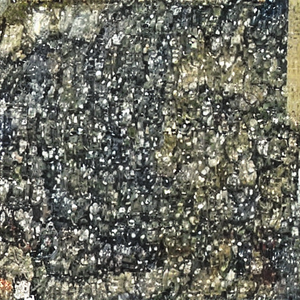
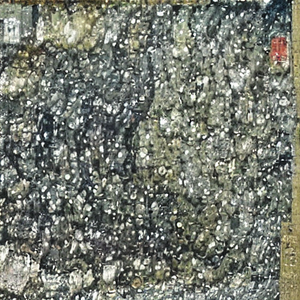
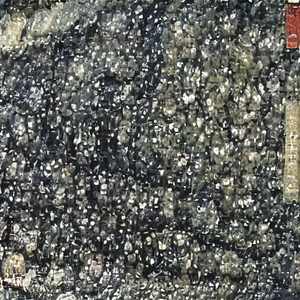
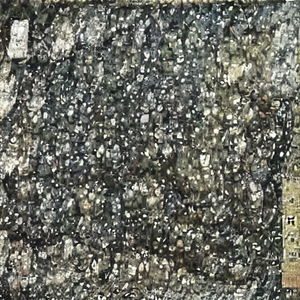

In [39]:
set_random_seed(seed)

outputs, track_stats = pipe(
    prompt_embeds=auged_prompt_embeds,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    num_images_per_prompt=num_images_per_prompt,
    track_noise_norm=True,
    height=image_size,
    width=image_size,
)
outputs = outputs.images
print(type(outputs[0]))
print(f"prompt: {prompt}")
media.show_images(outputs, width=300)